# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)





In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


**Cell type : TextRead**

6b) Write a code to do polynomial regression with quadratic regularization that takes degree d and regularization parameter λ as input.

In [2]:
# Cell type : CodeWrite
# write the function for Polynomial regression with quadratic regularization here.

def poly_features(x,degree):
    no_of_rows=len(x)
    no_of_columns=degree+1
    matrix=[]
    
    for i in range(no_of_rows):
        row=[]
        for j in range(no_of_columns):
            row.append(1)
        matrix.append(row)

    for i in range(1,no_of_columns):
        for j in range(no_of_rows):
            matrix[j][i]=x[j]**i
    return matrix
def transpose(x):
    no_of_rows=len(x)
    no_of_columns=len(x[0])
    transpose=[]
    
    for i in range(no_of_columns):
        row=[]
        for j in range(no_of_rows):
            row.append(0)
        transpose.append(row)
    
    for i in range(no_of_rows):
        for j in range(no_of_columns):
            transpose[j][i]=x[i][j]
    return transpose
def matrix_multiply(a,b):
    no_of_rows_a=len(a)
    no_of_columns_a=len(a[0])
    no_of_rows_b=len(b)
    no_of_columns_b=len(b[0])
    result=[]
        
    for i in range(no_of_rows_a):
        row=[]
        for j in range(no_of_columns_b):
            row.append(0)
        result.append(row)
        
    for i in range(no_of_rows_a):
        for j in range(no_of_columns_b):
            for k in range(no_of_columns_a):
                result[i][j]=result[i][j]+a[i][k]*b[k][j]
    return result
def matrix_addition(a,b):
    no_of_rows=len(a)
    no_of_columns=len(a[0])
    result=[]
        
    for i in range(no_of_rows):
        row=[]
        for j in range(no_of_columns):
            row.append(0)
        result.append(row)

    for i in range(no_of_rows):
        for j in range(no_of_columns):
            result[i][j]=a[i][j]+b[i][j]

    return result
def find_mse(x,y):
    a=len(x)
    sum=0
    mean=[]    #  1 x no_of-columns
    for i in range(a):
        mid=x[i]-y[i]
        sum=sum+mid*mid
    mse=sum/a
    return mse
def find_mean(x):
    sum=0
    count=0
    for i in x:
        sum=sum+i
        count=count+1
    return sum/count



# def polyregression(Data,lambda_l,degree):
#     """ Build the regression model """

#     Arguments:
#     Data: Dataset
#     Lambda: regularization parameter
#     Degree: Degree of the polynomial

#     output: weights

#     return weights

def polyregression(x,y,l):
    no_of_rows=len(x)
    no_of_columns=len(x[0])
    identity=[]
    
    for i in range(no_of_columns):
        row=[]
        for j in range(no_of_columns):
            row.append(0)
        identity.append(row)
        
    for i in range(no_of_columns):
        for j in range(no_of_columns):
            if i==j :
                identity[i][j]=1
                
    for i in range(no_of_columns):
        for j in range(no_of_columns):
            if identity[i][j]==1:
                identity[i][j]=l

    column=[]
    for i in range(len(y)):
        row=[]
        row.append(y[i])
        column.append(row)

        
                
    tp=transpose(x)   # no_of_columns x no_of _rows
    first=matrix_multiply(tp,x)  # no_of_columns x no_of columns
    second=identity # no_of_columns x no_of_columns
    sub_part=matrix_addition(first,second) # no_of_columns x no_of_columns
    third=np.linalg.inv(sub_part) # no_of_columns x no_of_columns
    fourth=matrix_multiply(tp,column) # no_of_columns x no_of_columns
    final=matrix_multiply(third,fourth) # no_of_columns x no_of_columns

    return final

def output(x,y):
    return matrix_multiply(x,y)


data=np.loadtxt(r"C:\Users\palip\Desktop\Files\PRML\PRML Assignment\ass-3\bayes_variance_data.csv",delimiter=',',skiprows=1)
X=data[:,0]
Y=data[:,1]
np.random.seed(2)
indices=np.arange(len(X))
np.random.shuffle(indices)
X=X[indices]
Y=Y[indices]
res=poly_features(X,24)
r1=polyregression(res,Y,1)
predict=output(res,r1)

6c)Run the code for degree $d = 24$ and for each $\lambda$ in the set:

$$
\{10^{-15},\ 10^{-9},\ 10^{-6},\ 10^{-3},\ 10^{-2},\ 10^{-1},\ 1,\ 10^{1},\ 10^{2},\ 10^{3},\ 10^{6},\ 10^{9},\ 10^{15}\}
$$


  i) Perform 5-fold cross-validation on the 100 data points (20 datapoints in each fold). For each fold, compute both training and validation errors using the mean squared error loss function. \\
  ii) Calculate the average training and validation errors across the 5 folds.

In [6]:
# def KFold_Poly(Data):
#     """ Split data for training and testing. Then train the model """
#     """ Use the trained model to make predictions for test data """

#     Arguments: Dataset

#     output: Training_score, Validation_score


#     return Training_score, Validation_score


def KFold_Poly(x,y,degree,L):
    
    no_of_rows=len(x)
    no_of_folds=int(no_of_rows/5)

    average_training_errors=[]
    average_validation_errors=[]



    fold_train=[]
    fold_val=[]
    
    for k in range(5):
        fold_train.append([])
        fold_val.append([])

    for lamb in L:
        training_errors=[]
        validation_errors=[]
        final_training_errors=[]
        final_validation_errors=[]

        for j in range(5):
            validation=[]
            training=[]
            begin=j*no_of_folds
            end=(j+1)*no_of_folds

            for k in range(begin,end):
                validation.append(k)
                
            for k in range(no_of_rows):
                if k not in validation:
                    training.append(k)

            x_train=[]
            y_train=[]
            x_val=[]
            y_val=[]

            for k in training:
                x_train.append(x[k])
                y_train.append(y[k])

            for k in validation:
                x_val.append(x[k])
                y_val.append(y[k]) 

            x_train=poly_features(x_train,degree)
            x_val=poly_features(x_val,degree)

            weight=polyregression(x_train,y_train,lamb)

            y_t_predict=output(x_train,weight)
            y_v_predict=output(x_val,weight)

            y_t_predict_1=[]
            for r in y_t_predict:
                y_t_predict_1.append(r[0])
            
            y_v_predict_1=[]
            for r in y_v_predict:
                y_v_predict_1.append(r[0])

            y_t_predict=y_t_predict_1
            y_v_predict=y_v_predict_1

            t_mse=find_mse(y_train,y_t_predict)
            training_errors.append(t_mse)
            fold_train[j].append(float(t_mse))
            
            v_mse=find_mse(y_val,y_v_predict)
            validation_errors.append(v_mse)
            fold_val[j].append(float(v_mse))

        avg_t_error=find_mean(training_errors)      
        average_training_errors.append(avg_t_error)
        

        avg_v_error=find_mean(validation_errors)      
        average_validation_errors.append(avg_v_error)
        

        
            

        for ek in training_errors:
            xyz=float(ek)
            final_training_errors.append(xyz)
        for wk in validation_errors:
            xyz=float(ek)
            final_validation_errors.append(xyz)


    for j in range(5):
        print(f"\n Fold {j + 1} Results")
        print("Log Lambda            | Training Error          | Validation Error")
        
        print("------------------------------------------------------------------")
        for k in range(len(L)):
            lambda_val = L[k]
            train_err = fold_train[j][k]
            val_err = fold_val[j][k]
            print(f"{np.log10(lambda_val):<21.0f} | {train_err:<23.8f} | {val_err:<23.8f}")

    print("\n")
    print("Average Training and Validation Errors across the 5 folds")
    print("\n")

    print("Log Lambda            | Average Training Error  | Average Validation Error")
    
    print("----------------------------------------------------------------------")
    for k in range(len(L)):
        lambda_val = L[k]
        avg_train_err = float(average_training_errors[k])
        avg_val_err = float(average_validation_errors[k])
        print(f"{np.log10(lambda_val):<21.0f} | {avg_train_err:<23.8f} | {avg_val_err:<23.8f}")

    return average_training_errors,average_validation_errors

degree=24
l=[10**(-15),10**(-9),10**(-6),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(6),10**(9),10**(15)]
tag,vag=KFold_Poly(X,Y,degree,l)



 Fold 1 Results
Log Lambda            | Training Error          | Validation Error
------------------------------------------------------------------
-15                   | 0.88488383              | 1.74290838             
-9                    | 0.92782356              | 1.10945190             
-6                    | 0.94349030              | 1.08195308             
-3                    | 0.98601901              | 1.33716392             
-2                    | 1.06316710              | 1.52641703             
-1                    | 1.24429252              | 1.92837133             
0                     | 1.62185913              | 2.98300067             
1                     | 2.77653344              | 5.93659431             
2                     | 5.87068359              | 11.59969700            
3                     | 9.48989337              | 16.59126422            
6                     | 10.57173856             | 17.93564830            
9                     | 10.57301588

6d)  Construct a learning curve by plotting the average training and validation errors against the model complexity ($\log_{10} \lambda$). Based on this learning curve, identify the (i) model with the highest bias, (ii) model with the highest variance?, and (iii) the model that will work best on some unseen data.

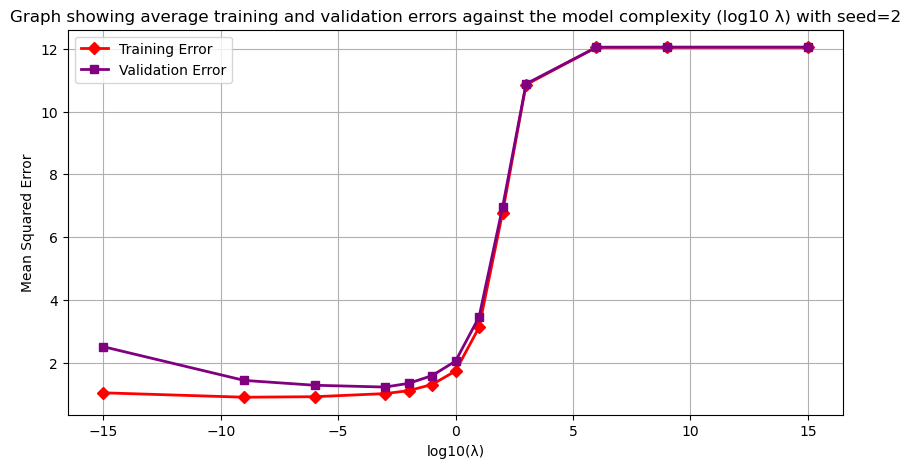

High Bias is  15
High Variance is  -15
Best Model is  -3


In [7]:
# Cell type : CodeWrite
# Write the cod for plotting.


log_l=[]
for i in l:
    x=np.log10(i)
    log_l.append(int(x))
plt.figure(figsize=(10,5))
plt.plot(log_l,tag,marker='D',linewidth=2,label="Training Error",color='red')
plt.plot(log_l,vag,marker='s',linewidth=2,label="Validation Error",color='purple')
plt.title("Graph showing average training and validation errors against the model complexity (log10 λ) with seed=2")
plt.xlabel("log10(λ)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()


high_train_error=0
high_train_error_index=0
high_validation_error=0
high_validation_error_index=0

min_train_error=1000
min_train_error_index=0
min_validation_error=1000
min_validation_error_index=0

gap=[]
for i in range(len(tag)):
    a=vag[i]-tag[i]
    gap.append(a)
min_gap=0
min_gap_index=0

for i in range(len(tag)):
    if tag[i]>high_train_error:
        high_train_error=tag[i]
        high_train_error_index=i

for i in range(len(vag)):
    if vag[i]>high_validation_error:
        high_validation_error=vag[i]
        high_validation_error_index=i

for i in range(len(tag)):
    if tag[i]<min_train_error:
        min_train_error=tag[i]
        min_train_error_index=i

for i in range(len(vag)):
    if vag[i]<min_validation_error:
        min_validation_error=vag[i]
        min_validation_error_index=i

for i in range(len(gap)):
    if gap[i]>min_gap:
        min_gap=gap[i]
        min_gap_index=i

        
high_bias_original=l[high_train_error_index]
high_variance_original=l[min_gap_index]
best_model_original=l[min_validation_error_index]


high_bias=log_l[high_train_error_index]
print("High Bias is ",high_bias)

high_variance=log_l[min_gap_index]
print("High Variance is ",high_variance)

best_model=log_l[min_validation_error_index]
print("Best Model is ",best_model)

6e) Plot the fitted curve to the given data ($\hat{y}$ against $x$) for the three models reported in part (e).

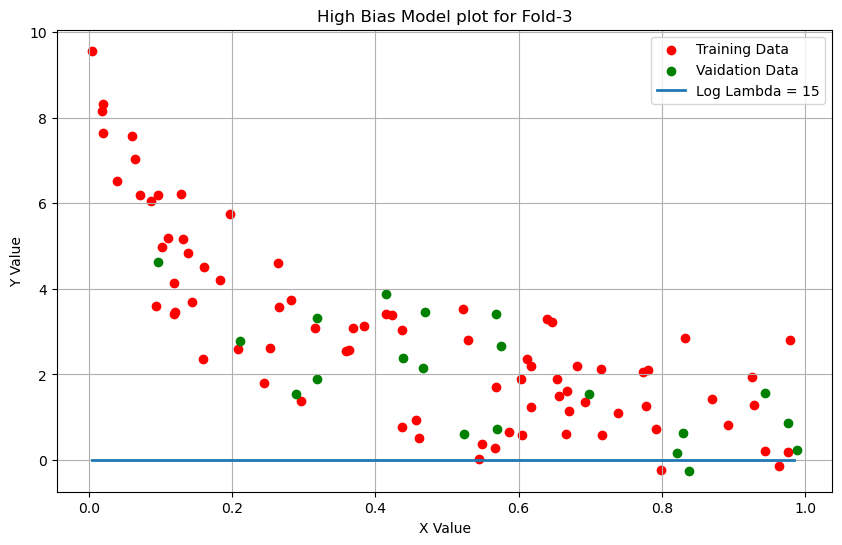

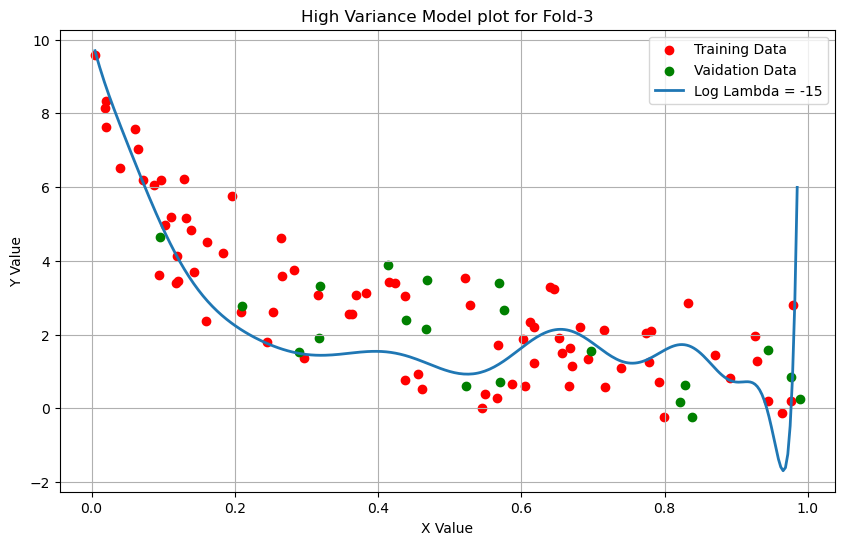

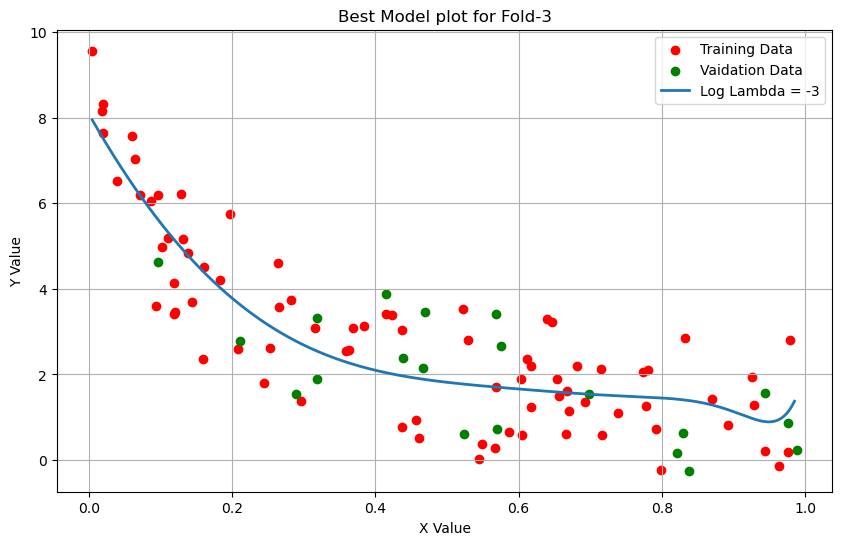

In [5]:
# Cell type : CodeWrite
# Write the cod for plotting.
def plot(x,y,l):
    no_of_rows=len(x)
    target_fold_size=int(no_of_rows/5)

    validation=[]
    training=[]
    begin=3*target_fold_size
    end=(3+1)*target_fold_size

    for k in range(begin,end):
        validation.append(k)
        
    for k in range(no_of_rows):
        if k not in validation:
            training.append(k)

    x_train=[]
    y_train=[]
    x_val=[]
    y_val=[]

    for k in training:
        x_train.append(x[k])
        y_train.append(y[k])

    for k in validation:
        x_val.append(x[k])
        y_val.append(y[k]) 

    x1_train=poly_features(x_train,degree)

    minimum_of_x=1000
    maximum_of_x=0
    for i in range(len(x)):
        if x[i]<minimum_of_x:
            minimum_of_x=x[i]

    for i in range(len(x)):
        if x[i]>maximum_of_x:
            maximum_of_x=x[i]

    a=(maximum_of_x-minimum_of_x)/300
    x1_grid=[]
    x1=minimum_of_x
    for i in range(300):
        x1_grid.append(x1)
        x1=x1+a
        
    x_grid=poly_features(x1_grid,degree)

    
    final_list=[(high_bias_original,"High Bias Model plot for Fold-3"),(high_variance_original,"High Variance Model plot for Fold-3"),(best_model_original,"Best Model plot for Fold-3")]
    for i,j in final_list:
        w=polyregression(x1_train,y_train,i)
        y_grid=output(x_grid,w)


        plt.figure(figsize=(10,6))
        plt.scatter(x_train,y_train,label="Training Data",color='red')
        plt.scatter(x_val,y_val,label="Vaidation Data",color='green')
        plt.plot(x1_grid,y_grid,linewidth=2,label=f"Log Lambda = {np.log10(i):.0f}")
        plt.xlabel("X Value")
        plt.ylabel("Y Value")

        plt.title(j)
        plt.legend()
        plt.grid(True)
        plt.show()

plot(X,Y,l)